In [26]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
%matplotlib inline

data = pd.read_csv('Nsample.csv')
dataframe = pd.DataFrame(data)

   #### Information of the dataset

In [27]:
dataframe.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [28]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   category           200853 non-null  object
 1   headline           200847 non-null  object
 2   authors            164233 non-null  object
 3   link               200853 non-null  object
 4   short_description  181141 non-null  object
 5   date               200853 non-null  object
dtypes: object(6)
memory usage: 9.2+ MB


#### Preprocessing and cleaning the dataset

In [29]:
dataframe.drop('link',axis=1,inplace=True)
dataframe.drop('authors',axis=1,inplace=True)
dataframe.drop('date',axis=1,inplace=True)
dataframe.head()

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."


##### Removing the missing and undefined rows in the dataset

Removing the missing and undefined rows in the dataset 

NaN means missing data
Missing data is labelled NaN.
Note that np.nan is not equal to Python None. Note also that np.nan is not even to np.nan as np.nan basically means undefined.

In [30]:

dataframe = dataframe[dataframe['short_description'].notna()]
dataframe = dataframe[dataframe['headline'].notna()]
dataframe = dataframe[dataframe['category'].notna()]

dataframe.rename(columns = {'short_description':'message'}, inplace = True)
dataframe.rename(columns = {'category':'target_labels'}, inplace = True)
dataframe['length']=dataframe['headline'].apply(len)
dataframe.head()

,target_labels,headline,message,length
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,64
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,75
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,47
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,69
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",71


In [31]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 181140 entries, 0 to 200852
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   target_labels  181140 non-null  object
 1   headline       181140 non-null  object
 2   message        181140 non-null  object
 3   length         181140 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 6.9+ MB


#### Unique labels the dataset

In [32]:
dataframe['target_labels'].unique()

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

#### Filtering rows based on the 5 labels which we have choosen 

In [33]:
dataframe['target_labels'] = dataframe['target_labels'].replace(['HEALTHY LIVING'],['HEALTH'])
dataframe['target_labels'] = dataframe['target_labels'].replace(['MONEY'],['FINANCE'])

categories = ['POLITICS', 'EDUCATION', 'HEALTH','FINANCE','SPORTS']
#filtering
dataframe = dataframe.loc[dataframe['target_labels'].isin(categories)]

dataframe['target_labels'].unique()

array(['POLITICS', 'SPORTS', 'EDUCATION', 'HEALTH', 'FINANCE'],
      dtype=object)

#### Concatinating the headline and short description to increase the word count

In [34]:
dataframe['headline'] = dataframe['message']+ dataframe['headline']
dataframe['length']= dataframe['headline'].apply(len)

#Removing the redundent col in the dataset
dataframe.drop('message',axis=1,inplace=True)


In [35]:
dataframe.head()


,target_labels,headline,length
13,POLITICS,Last month a Health and Human Services officia...,237
14,POLITICS,The wiretaps feature conversations between Ale...,213
15,POLITICS,"But don't count on Robert Mueller to nail him,...",142
16,POLITICS,Just a peeping minute.Booyah: Obama Photograph...,87
17,POLITICS,Irish women will no longer have to travel to t...,155


#### Visualization of the dataset  

<AxesSubplot:xlabel='target_labels', ylabel='length'>

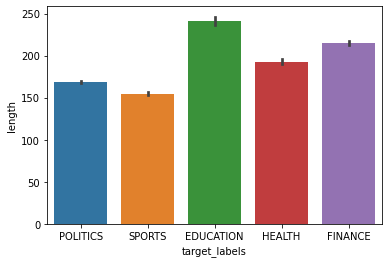

In [36]:
sns.barplot(x='target_labels',y='length',data=dataframe)

#### Label Encoding 

In [37]:
from sklearn.preprocessing import LabelEncoder
dataframe['target'] = LabelEncoder().fit_transform(dataframe.target_labels)
#"'POLITICS=3', 'EDUCATION 0', 'HEALTH =1','Finance = 2','SPORTS =4'"


In [38]:
dataframe.drop('target_labels',axis=1,inplace=True)
dataframe.drop('length',axis=1,inplace=True)
dataframe.head()

,headline,target
13,Last month a Health and Human Services officia...,3
14,The wiretaps feature conversations between Ale...,3
15,"But don't count on Robert Mueller to nail him,...",3
16,Just a peeping minute.Booyah: Obama Photograph...,3
17,Irish women will no longer have to travel to t...,3


#### Spliting the dataset into training and test dataset ,ratio is 80:20  

In [39]:
data_train, data_test = train_test_split(dataframe,test_size=0.2,random_state = 42,shuffle=True)

#### Bag of Words(BoW transformation) 

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

countVect = CountVectorizer()
xTrainTermFrequency = countVect.fit_transform(data_train.headline)
xTestTermFrequency = countVect.transform(data_test.headline)

#print(xTrainTermFrequency)
print('Shape of Sparse Matrix: ', xTrainTermFrequency.shape)
print('Amount of Non-Zero occurences: ', xTrainTermFrequency.nnz)

Shape of Sparse Matrix:  (33329, 37407)
Amount of Non-Zero occurences:  826343


#### TF-IDF Transformations

In [41]:
#Importing TfidfVectorizer to a collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfTransformer

tfidfTransformer = TfidfTransformer()
xTrainTFIDF = tfidfTransformer.fit_transform(xTrainTermFrequency)
xTestTFIDF = tfidfTransformer.transform(xTestTermFrequency)

#print(xTrainTermFrequency)
print('Shape of Sparse Matrix: ', xTrainTermFrequency.shape)
print('Amount of Non-Zero occurences: ', xTrainTermFrequency.nnz)

Shape of Sparse Matrix:  (33329, 37407)
Amount of Non-Zero occurences:  826343


#### MultinomialNBC with KFold crossvalidation and GridSearch

In [42]:
%%time
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.naive_bayes import MultinomialNB

#Cross-validation
skf = StratifiedKFold(n_splits=10)
params = {}
nb = MultinomialNB()
gs = GridSearchCV(nb, cv=skf, param_grid=params, return_train_score=True)


Wall time: 0 ns


#### Training the model

In [43]:
%%time

gs.fit(xTrainTFIDF,data_train.target)
gs.cv_results_

Wall time: 443 ms


{'mean_fit_time': array([0.02550313]),
 'std_fit_time': array([0.00599391]),
 'mean_score_time': array([0.00249021]),
 'std_score_time': array([0.00291965]),
 'params': [{}],
 'split0_test_score': array([0.75127513]),
 'split1_test_score': array([0.75787579]),
 'split2_test_score': array([0.75937594]),
 'split3_test_score': array([0.75637564]),
 'split4_test_score': array([0.75247525]),
 'split5_test_score': array([0.75217522]),
 'split6_test_score': array([0.75667567]),
 'split7_test_score': array([0.75277528]),
 'split8_test_score': array([0.75307531]),
 'split9_test_score': array([0.75690276]),
 'mean_test_score': array([0.7548982]),
 'std_test_score': array([0.00269292]),
 'rank_test_score': array([1]),
 'split0_train_score': array([0.77333644]),
 'split1_train_score': array([0.77300307]),
 'split2_train_score': array([0.77246966]),
 'split3_train_score': array([0.77320309]),
 'split4_train_score': array([0.77296973]),
 'split5_train_score': array([0.7745366]),
 'split6_train_score

In [44]:
#nb.fit(xTrainTFIDF,data_train.target)
#nb.score(xTrainTFIDF,data_train.target)
#gs.score(xTrainTFIDF,data_train.target)

In [45]:
%%time
gs.param_grid = {'alpha': [0.1, 2]}
gs.fit(xTrainTFIDF, data_train.target)
gs.score(xTrainTFIDF,data_train.target)

Wall time: 840 ms


0.9498934861531999

 ### Time taken to train the NBC model is :880ms

#### Testing the model against test dataset

In [46]:
predicted = gs.best_estimator_.predict(xTestTFIDF)

#### Prior Probability values of classes P(Y)

In [47]:
best_model = gs.best_estimator_
#best_model.class_count_
#best_model.classes_
best_model.class_log_prior_

array([-3.80753298, -3.20706431, -2.05903843, -0.34471518, -2.28944015])

#### Probaility of P(Xi/Y)

In [48]:
#best_model.feature_count_
best_model.feature_log_prob_
#best_model.predict_proba(xTestTFIDF)

array([[ -9.86904437,  -8.34614126, -11.22194278, ..., -11.22194278,
        -11.22194278, -11.22194278],
       [-10.2377195 ,  -6.89931653, -11.54727555, ..., -11.54727555,
        -11.54727555, -11.54727555],
       [-11.1634557 ,  -8.15677929, -10.92787297, ..., -12.3633712 ,
        -12.3633712 , -12.3633712 ],
       [-12.5925482 ,  -7.89405896, -13.89649945, ..., -12.47629109,
        -12.18255067, -12.26992295],
       [-10.26864304,  -8.24967997, -12.1068977 , ..., -12.1068977 ,
        -12.1068977 , -12.1068977 ]])

In [49]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print ("Accuracy : ", accuracy_score(data_test.target, predicted))

Accuracy :  0.8844353774150966


In [52]:
print ("")
print ("Classification Report : ")
print (classification_report(data_test.target, predicted, target_names = categories))
print ("Confusion Matrix : ")
print (metrics.confusion_matrix(data_test.target, predicted))


Classification Report : 
              precision    recall  f1-score   support

    POLITICS       0.80      0.05      0.10       152
   EDUCATION       0.90      0.25      0.39       357
      HEALTH       0.87      0.74      0.80      1013
     FINANCE       0.88      0.99      0.93      5967
      SPORTS       0.95      0.73      0.83       844

    accuracy                           0.88      8333
   macro avg       0.88      0.55      0.61      8333
weighted avg       0.89      0.88      0.87      8333

Confusion Matrix : 
[[   8    5   19  120    0]
 [   0   88   47  220    2]
 [   0    2  754  252    5]
 [   2    2   39 5901   23]
 [   0    1   10  214  619]]


 
##### EDUCATION = 0 
##### HEALTHY  = 1
##### FINANCE = 2
##### POLITICS = 3 
#####  SPORTS = 4

In [51]:
#custom_headline_by_user
#user_input_data_1 =['This is a message related to sports and lebron lifts nba championship again'] 
user_input_data_1 = ['Trump marriage in spoils after elction loss'] 

userdataTermFrequency = countVect.transform(user_input_data_1)
user_dataTFID = tfidfTransformer.transform(userdataTermFrequency)

autual_headline_predicted = gs.best_estimator_.predict(user_dataTFID)
print(autual_headline_predicted)
def headlinePredict(target_num):
    if target_num == 0:
        return "Headline comes under EDUCATION section"
    if target_num == 1:
        return "Headline comes under HEALTH section"
    if target_num == 2:
        return "Headline comes under FINANCE section"
    if target_num == 3:
        return "Headline comes under POLITICS section"
    if target_num == 4:
        return "Headline comes under SPORTS section"
    
#headlinePredict(gs.best_estimator_.predict(user_dataTFID))

[3]


In [67]:
headlinePredict(gs.best_estimator_.predict(user_dataTFID))

'Headline comes under POLITICS section'